In [3]:
import pandas as pd
import sys
import os
import json
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Output, Input
# import plotly.tools as tls
# import dash_cytoscape as cyto
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import networkx as nx
from cyjupyter import Cytoscape
from networkx.readwrite import cytoscape_data
import pdb
# import pixiedust
#import the class 
file_dir = os.path.dirname('__file__')
sys.path.append(file_dir)
file_dir = os.path.dirname('__file__')
sys.path.append(file_dir)
from NetAnalysis import NetAnalysis
import gurobipy as gu
import time
import pickle

%load_ext autoreload
%autoreload 2

True


# functions

In [2]:
def saveData(net, name):
    with open("pickled/{}.pickle".format(name), "wb") as f:
            pickle.dump(net,f)
    nx.write_gml(net.G ,"pickled/{}.csv".format(name))

In [4]:
def getCGobj (case,k):
    ma = max([v for v in case[k].keys() if "master" in v])
    return case[k][ma]['obj']
def getCGKist(case,id):
    cas = case[id]['cgAll']
    cgRes = {v1:getCGobj(cas,v1) for v1 in cas.keys() }
    return pd.DataFrame(cgRes,index =  ['cg']).T
def compareFor(res, id):
    cgr = getCGKist(res,id)
    mipr =pd.DataFrame( pd.DataFrame(res[id]['mip']['obj']).unstack()['obj']['MIP_init'])
    df = pd.concat([cgr,mipr],axis=1)
    return pd.concat([df], keys=[id], names=['case'])



In [35]:
def readResFromPickles(path):
    res , net, names = {}, {}, {}
    files2 = [file for file in os.listdir(path) 
             if os.path.isfile(os.path.join(path, file))]
    files2
    
    for i in list(files2):

        if "validd" in i:
            with open(path+i,'rb') as f:
                res[i.replace("validd", "")] = pd.read_pickle(f)
                names[i.replace("validd", "")] = i
    return res, names

def pickleAllToDF(path):
    results1, names = readResFromPickles(path)
    allCases = [compareFor(results1, id) for id in results1.keys()]
    allCasesDF = pd.concat(allCases)
    allCasesDF ['differ'] = allCasesDF ['cg']-allCasesDF ['MIP_init']
    allCasesDF['gap']=allCasesDF['differ'].divide(allCasesDF['cg'].replace(0, np.nan))
    allCasesDF['gap'] = allCasesDF['gap'].clip(lower = 0)
    allCasesDF.index.set_names(['case','k'],inplace = True)
    hists = allCasesDF[allCasesDF.gap<0.3]
    others = allCasesDF[allCasesDF.gap>0.3]
    return hists, names
def f(x1,y1):
    try:
        b = bins[x1][y1]
        return b
    except:
        return 0
def pickleAllToNumEdges(path):
    results1 = readResFromPickles(path)
    allCases = [compareFor(results1, id) for id in results1.keys()]
    allCasesDF = pd.concat(allCases)
    allCasesDF ['differ'] = allCasesDF ['cg']-allCasesDF ['MIP_init']
    allCasesDF['gap']=allCasesDF['differ'].divide(allCasesDF['cg'].replace(0, np.nan))
    allCasesDF['gap'] = allCasesDF['gap'].clip(lower = 0)
    allCasesDF.index.set_names(['case','k'],inplace = True)
#     hists = allCasesDF[allCasesDF.gap<0.3]
    return allCasesDF

In [12]:
results1, names = readResFromPickles('pickled/')

In [664]:

len(ned)

107

In [691]:
ned.edge.std(), ned.edge.mean()

(47.45252576876032, 101.1)

(array([2., 2., 0., 5., 3., 2., 6., 6., 4., 8., 4., 7., 7., 3., 6., 6., 3.,
        3., 7., 5., 6., 4., 2., 2., 0., 2., 1., 2., 0., 2.]),
 array([7.0, 13.966666666666667, 20.933333333333334, 27.9,
        34.86666666666667, 41.833333333333336, 48.8, 55.766666666666666,
        62.733333333333334, 69.7, 76.66666666666667, 83.63333333333334,
        90.6, 97.56666666666666, 104.53333333333333, 111.5,
        118.46666666666667, 125.43333333333334, 132.4, 139.36666666666667,
        146.33333333333334, 153.3, 160.26666666666668, 167.23333333333335,
        174.2, 181.16666666666666, 188.13333333333333, 195.1,
        202.06666666666666, 209.03333333333333, 216.0], dtype=object),
 <a list of 30 Patch objects>)

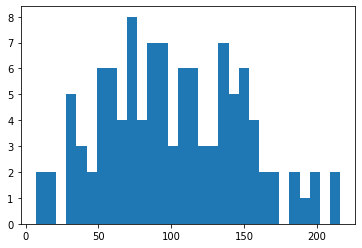

In [14]:
ned = pd.DataFrame(columns = ['node','edge'])
for id in results1.keys():
    ned.loc[id]= results1[id]['size']
plt.hist(ned.edge,bins=30)


(array([2., 2., 0., 5., 3., 2., 6., 6., 4., 8., 4., 7., 7., 3., 6., 6., 3.,
        3., 7., 5., 6., 4., 2., 2., 0., 2., 1., 2., 0., 2.]),
 array([7.0, 13.966666666666667, 20.933333333333334, 27.9,
        34.86666666666667, 41.833333333333336, 48.8, 55.766666666666666,
        62.733333333333334, 69.7, 76.66666666666667, 83.63333333333334,
        90.6, 97.56666666666666, 104.53333333333333, 111.5,
        118.46666666666667, 125.43333333333334, 132.4, 139.36666666666667,
        146.33333333333334, 153.3, 160.26666666666668, 167.23333333333335,
        174.2, 181.16666666666666, 188.13333333333333, 195.1,
        202.06666666666666, 209.03333333333333, 216.0], dtype=object),
 <a list of 30 Patch objects>)

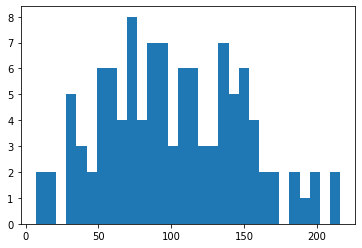

In [690]:
ned = pd.DataFrame(columns = ['node','edge'])
for id in results1.keys():
    ned.loc[id]= results1[id]['size']
plt.hist(ned.edge,bins=30)
# ax = plt.gca()
# ax2 = ax.twinx()
# ned.edge.plot.density(ax = ax2, colo)

# get data

In [17]:
import numpy as np

In [55]:
histData, names = pickleAllToDF("pickled/")
bins = {}

for i in histData.index.levels[1]:
    b = np.histogram(histData.loc[(slice(None), slice(i)), 'gap'], bins = np.arange(5)/10)
    bins[i] = {k:v for v,k in zip(b[0],b[1])}


# Valid

In [33]:
histData

cg MIP_init    differ        gap
case k                                    
1    1   7.0        7         0          0
     2   5.0        5         0          0
     3   3.0        3         0          0
     4   2.0        2  4.99e-10  2.495e-10
     5   1.0        1     5e-10      5e-10
...      ...      ...       ...        ...
99   1  43.0       43         0          0
     2  35.0       35         0          0
     3  29.0       28         1  0.0344828
     4  24.0       22         2  0.0833333
     5  20.0       17         3       0.15

[457 rows x 4 columns]

In [53]:
histData[histData.gap<0.15].loc[(slice("345","345") ,slice(None))]

cg MIP_init differ gap
case k                          
345  1  17.0       17      0   0
     2   9.0        9      0   0
     3   5.0        5      0   0
     4   1.0        1      0   0

In [56]:
histData[histData.gap>0.15]

cg  MIP_init  differ       gap
case k                                  
4    4  20.0      15.0     5.0  0.250000
     5  13.0      10.0     3.0  0.230769

In [670]:
len(histData[histData.gap<=0.15])/len(histData)

0.8981900452488688

In [668]:
len(histData[histData.gap==0])

317

(array([339.,  18.,  17.,  12.,  20.,  14.,   8.,  11.,   9.,   9.]),
 array([0.0, 0.02857142857142857, 0.05714285714285714, 0.08571428571428572,
        0.11428571428571428, 0.14285714285714285, 0.17142857142857143,
        0.19999999999999998, 0.22857142857142856, 0.2571428571428571,
        0.2857142857142857], dtype=object),
 <a list of 10 Patch objects>)

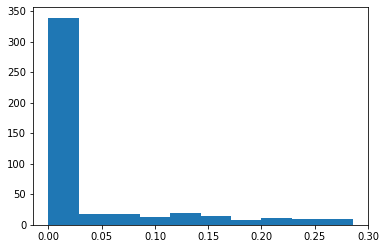

In [689]:
plt.hist (histData.gap)

# plot hist

# get data

Text(0.5, 0, 'z label')

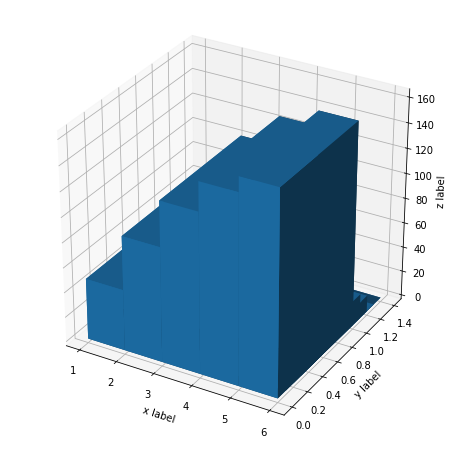

In [583]:
_x = allCasesDF1.index.levels[1]
_y = np.arange(5)/10
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
z = []
for i in range(len(y)):
    z.append(f(x[i],y[i]))
bottom = np.zeros_like(z)

width = depth = 1
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d( x,y, bottom, width, depth, z, shade=True)
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_zlabel("z label")
# ax.invert_xaxis()
# ax.invert_yaxis()

In [ ]:
np.histogram()

In [440]:
len(results1.keys()) , len( allCasesDF.gap[ allCasesDF.gap<0.2])

(51, 184)

In [202]:
results5

{'1': {'size': (30, 151),
  'mip':                time   obj                           sol
  k method                                               
  1 MIP       52.8856  35.0                        [e149]
    init       0.0239  35.0                        [e149]
    MIP_init  48.6008  35.0                        [e149]
  2 MIP       49.1182  25.0                  [e149, e150]
    init       0.0122  25.0                  [e149, e150]
    MIP_init  47.9306  25.0                  [e149, e150]
  3 MIP       48.6852  17.0            [e149, e150, e151]
    init       0.0179  18.0              [e149, e150, e1]
    MIP_init  50.5858  17.0            [e149, e150, e151]
  4 MIP       51.3006   9.0      [e142, e149, e150, e151]
    init       0.0152  14.0        [e149, e150, e1, e140]
    MIP_init  53.7688   9.0      [e142, e149, e150, e151]
  5 MIP       54.3612   2.0  [e1, e142, e149, e150, e151]
    init       0.0198  11.0    [e149, e150, e1, e140, e2]
    MIP_init  59.9037   2.0  [e1, e142,

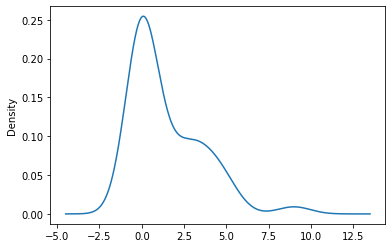

In [274]:
allCases5 = [compareFor(id) for id in results5.keys()]
allCases5 = pd.concat(allCases5)
allCases5 ['differ'] = allCases5 ['cg']-allCases5 ['MIP_init']
allCases5['gap']=allCases5['differ'].divide(allCases5['cg'].replace(0, np.nan))
allCases5.differ.plot.density()

In [550]:
z

[10.0,
 9.68421052631579,
 9.142857142857142,
 8.728323699421965,
 8.316326530612244,
 0.0,
 0.3157894736842105,
 0.7857142857142857,
 0.9826589595375722,
 1.0204081632653061,
 0.0,
 0.0,
 0.07142857142857144,
 0.2890173410404625,
 0.6632653061224492,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0,
 0,
 0,
 0,
 0]

In [246]:
results5['5']

{}

In [272]:
allCases

cg MIP_init   differ        gap
case                                     
1    1  35.0       35        0          0
     2  25.0       25        0          0
     3  18.0       17        1  0.0555556
     4  14.0        9        5   0.357143
     5  11.0        2        9   0.818182
10   1  56.0       56        0          0
     2  47.0       47        0          0
     3  40.0       38        2       0.05
     4  33.0       29        4   0.121212
     5  26.0       22        4   0.153846
11   1  30.0       30        0          0
     2  24.0       22        2  0.0833333
     3  17.0       14        3   0.176471
     4   9.0        5        4   0.444444
     5   4.0  2.00005  1.99995   0.499989
2    1  15.0       15        0          0
     2   8.0        8        0          0
     3   3.0        3        0          0
     4   1.0        1        0          0
     5  -0.0       -1        1        NaN
3    1  31.0       31        0          0
     2  21.0       21        0          0
     3  12.0       12        0          0
     4   9.0        6        3   0.333333
     5   6.0        3        3        0.5
4    1  38.0       38        0          0
     2  30.0       30        0          0
     3  22.0       22        0          0
     4  20.0       15        5       0.25
     5  13.0       10        3   0.230769
6    1  42.0       42        0          0
     2  34.0       34        0          0
     3  27.0       27        0          0
     4  20.0       20        0          0
     5  19.0       14        5   0.263158
7    1  36.0       36        0          0
     2  29.0       29        0          0
     3  23.0       23        0          0
     4  17.0       17        0          0
     5  13.0       13        0          0
9    1  43.0       43        0          0
     2  34.0       34        0          0
     3  30.0       26        4   0.133333
     4  22.0       19        3   0.136364
     5  15.0       13        2   0.133333

In [218]:
id = '4'
def getCGobj (case,k):
    ma = max([v for v in case[k].keys() if "master" in v])
    return case[k][ma]['obj']
def getCGKist(case,id):
    cas = case[id]['cgAll']
    cgRes = {v1:getCGobj(cas,v1) for v1 in cas.keys() }
    pd.DataFrame(cgRes,index =  [id])
    return pd.DataFrame(cgRes,index =  [id]).T
cgr = getCGKist(results5,id)
mipr =pd.DataFrame( pd.DataFrame(results5[id]['mip']['obj']).unstack()['obj']['MIP_init'])
pd.concat([cgr,mipr],axis=1)

,4,MIP_init
1,38.0,38.0
2,30.0,30.0
3,22.0,22.0
4,20.0,15.0
5,13.0,10.0


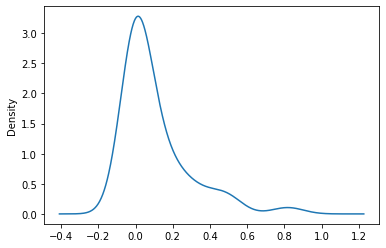

In [275]:
allCases.gap.replace(np.nan,0).plot.density()

In [166]:
res2['4']['mip'].unstack()

time                    obj                                  sol  \
method      MIP    init MIP_init   MIP  init MIP_init                   MIP   
k                                                                             
1       23.9612  0.0089  23.9314  38.0  38.0     38.0                  [e6]   
2       24.5630  0.0085  23.6906  30.0  30.0     30.0              [e2, e6]   
3       26.0393  0.0093  25.4672  22.0  22.0     22.0          [e1, e2, e6]   
4       31.2044  0.0132  30.8785  15.0  20.0     15.0      [e1, e2, e3, e6]   
5       36.2556  0.0156  31.2151  10.0  13.0     10.0  [e1, e2, e3, e6, e7]   

                                                      
method                    init              MIP_init  
k                                                     
1                         [e6]                  [e6]  
2                     [e6, e2]              [e2, e6]  
3                 [e6, e2, e1]          [e1, e2, e6]  
4           [e6, e2, e1, e124]      [e1, e2, e3, e6]  
5       [e6, e2, e1, e124, e3]  [e1, e2, e3, e6, e7]

# case 3 res2

In [216]:
mipr

,MIP_init
k,
1,38.0
2,30.0
3,22.0
4,15.0
5,10.0


In [469]:
np.histogram(y,hists.loc['1'].gap)

(array([0, 0, 5, 0], dtype=int64),
 array([0.0, 0.0, 0.0, 2.495001982794065e-10, 4.99999930347883e-10],
       dtype=object))

In [244]:
id = '6'
dd

{'size': (21, 66), 'mip':               time   obj                        sol
 k method                                           
 1 MIP       1.4490  42.0                      [e66]
   init      0.0023  42.0                      [e66]
   MIP_init  1.4008  42.0                      [e66]
 2 MIP       1.4340  34.0                  [e5, e66]
   init      0.0046  38.0                  [e66, e4]
   MIP_init  1.3787  34.0                  [e5, e66]
 3 MIP       1.5935  27.0             [e5, e44, e66]
   init      0.0064  35.0              [e66, e4, e2]
   MIP_init  2.5290  27.0            [e63, e65, e66]
 4 MIP       2.0593  20.0        [e5, e44, e63, e66]
   init      0.0085  27.0          [e66, e4, e2, e5]
   MIP_init  1.8980  20.0        [e5, e44, e63, e66]
 5 MIP       3.1201  14.0  [e32, e44, e58, e63, e66]
   init      0.0122  21.0      [e66, e4, e2, e5, e3]
   MIP_init  3.0263  14.0   [e5, e44, e58, e63, e66], 'cg':         int                              iny       m1t  m1obj      

(array([156.,   1.,   3.,   1.,   2.,   3.,   3.,   8.,   3.,   4.]),
 array([-2.945388812936045e-05, 0.018155309682501758, 0.036340073253132876,
        0.054524836823763995, 0.07270960039439511, 0.09089436396502623,
        0.10907912753565735, 0.12726389110628847, 0.1454486546769196,
        0.1636334182475507, 0.18181818181818182], dtype=object),
 <a list of 10 Patch objects>)

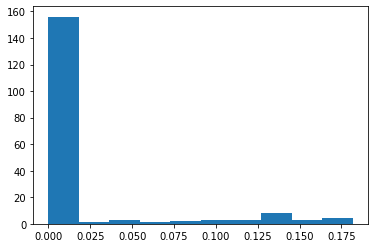

In [439]:
allCasesDF = pd.concat(allCases)
allCasesDF ['differ'] = allCasesDF ['cg']-allCasesDF ['MIP_init']
allCasesDF['gap']=allCasesDF['differ'].divide(allCasesDF['cg'].replace(0, np.nan))
plt.hist( allCasesDF.gap[ allCasesDF.gap<0.2]) 

cg  MIP_init
case                  
3    1  31.0      31.0
     2  21.0      21.0
     3  12.0      12.0
     4   9.0       6.0
     5   6.0       3.0
     1  31.0      31.0
     2  21.0      21.0
     3  12.0      12.0
     4   9.0       6.0
     5   6.0       3.0

In [328]:
from pathlib import Path
def readResFromPickles(path):
    res , net = {}, {}
    files2 = [file for file in os.listdir(path) 
             if os.path.isfile(os.path.join(path, file))]
    files2
    for i in list(files2):
        if "validd" in i:
            with open(path+i,'rb') as f:
                res[i.replace("validd", "")] = pickle.load(f)
    return res


In [228]:
df = compareFor('2')
df

,cg,MIP_init
1,15.0,15.0
2,8.0,8.0
3,3.0,3.0
4,1.0,1.0
5,-0.0,-1.0


In [178]:
max(['master1','master3'])

'master3'

In [171]:
cgRes = {}
res2['4']['cgAll'][3]

{'init': {'t': 0.01936507225036621, 'y': ['e1', 'e2', 'e6']},
 'master1': {'t': 19.07593059539795, 'obj': 22.0},
 'sub1': {'t': 0.002786874771118164, 'y': ['e1', 'e2', 'e6']}}

In [164]:
res2['3']['cg']

,int,iny,m1t,m1obj,s1t,s1y,m2t,m2obj,s2t,s2y
1,0.024803,['e141'],14.352673,31.0,0.002231,['e141'],,,,
2,0.020258,"['e141', 'e144']",12.705340,28.0,0.006142,"['e114', 'e141']",12.5653,21,0.00740457,"['e114', 'e141']"
3,0.019657,"['e2', 'e141', 'e144']",12.460421,27.0,0.004124,"['e114', 'e140', 'e141']",12.5801,12,0.00532556,"['e114', 'e140', 'e141']"
4,0.022725,"['e1', 'e2', 'e141', 'e144']",12.777518,26.0,0.004162,"['e3', 'e7', 'e140', 'e141']",12.9545,9,0.00498152,"['e3', 'e7', 'e140', 'e141']"
5,0.025182,"['e1', 'e2', 'e140', 'e141', 'e144']",12.508870,17.0,0.003033,"['e1', 'e3', 'e7', 'e140', 'e141']",12.38,6,0.00524354,"['e1', 'e3', 'e7', 'e140', 'e141']"


In [165]:
res2['3']['mip'].unstack()

time                    obj                 \
method      MIP    init MIP_init   MIP  init MIP_init   
k                                                       
1       15.8235  0.0035  15.5676  31.0  31.0     31.0   
2       15.9618  0.0062  15.6440  21.0  28.0     21.0   
3       15.6820  0.0086  15.9276  12.0  27.0     12.0   
4       15.6206  0.0105  15.6215   6.0  26.0      6.0   
5       17.3130  0.0135  16.4082   3.0  17.0      3.0   

                                   sol                              \
method                             MIP                        init   
k                                                                    
1                               [e141]                      [e141]   
2                         [e114, e141]                [e141, e144]   
3                   [e114, e140, e141]            [e141, e144, e2]   
4             [e114, e123, e140, e141]        [e141, e144, e2, e1]   
5       [e114, e123, e140, e141, e144]  [e141, e144, e2, e1, e140]   

                                        
method                        MIP_init  
k                                       
1                               [e141]  
2                         [e114, e141]  
3                   [e114, e140, e141]  
4             [e114, e123, e140, e141]  
5       [e114, e123, e140, e141, e144]

# case 2 res2

In [302]:
results1.keys()

dict_keys(['1', '10', '11', '13', '13123', '14', '15', '151', '16', '17', '18', '19', '2', '20', '21', '22', '22123', '23', '23123', '24', '24123', '25', '25123', '26', '26123', '27', '27123', '28', '28123', '29', '29123', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '55', '57', '58', '59', '6', '61', '62', '7', '8', '84', '85', '86', '89', '9', '92', '93', '94', '95', '96', '97', '98', '99'])

In [162]:
res2['2']['cg']

,int,iny,m1t,m1obj,s1t,s1y,m2t,m2obj,s2t,s2y
1,0.033866,['e53'],0.451165,15.0,0.001802,['e53'],,,,
2,0.012700,"['e2', 'e53']",0.451480,8.0,0.002860,"['e2', 'e53']",,,,
3,0.014997,"['e1', 'e2', 'e53']",0.452130,7.0,0.002271,"['e2', 'e4', 'e53']",0.411807,3,0.00462413,"['e2', 'e4', 'e53']"
4,0.017016,"['e1', 'e2', 'e3', 'e53']",0.413970,5.0,0.001210,"['e2', 'e3', 'e4', 'e53']",0.423939,1,0.00280762,"['e2', 'e3', 'e4', 'e53']"
5,0.019240,"['e1', 'e2', 'e3', 'e49', 'e53']",0.420955,-0.0,0.001152,"['e1', 'e2', 'e3', 'e49', 'e53']",,,,


In [370]:
allCasesDF = allCasesDF.clip(lower = 0)

In [163]:
res2['2']['mip'].unstack()

time                    obj                                    sol  \
method     MIP    init MIP_init   MIP  init MIP_init                     MIP   
k                                                                              
1       0.5481  0.0022   0.5558  15.0  15.0     15.0                   [e53]   
2       0.5813  0.0042   0.5754   8.0   8.0      8.0               [e2, e53]   
3       0.7156  0.0063   0.6657   3.0   7.0      3.0           [e2, e4, e53]   
4       0.7261  0.0083   0.6361   1.0   5.0      1.0       [e2, e3, e4, e53]   
5       0.5566  0.0104       -1  -0.0   0.0     -1.0  [e1, e2, e3, e49, e53]   

                                                   
method                    init           MIP_init  
k                                                  
1                        [e53]              [e53]  
2                    [e53, e2]          [e2, e53]  
3                [e53, e2, e1]      [e2, e4, e53]  
4            [e53, e2, e1, e3]  [e2, e3, e4, e53]  
5       [e53, e2, e1, e3, e49]                 []

# case 1 res2

In [161]:
res2['1']['cg']

,int,iny,m1t,m1obj,s1t,s1y,m2t,m2obj,s2t,s2y
1,0.017112,['e149'],41.313473,35.0,0.002453,['e149'],,,,
2,0.035747,"['e149', 'e150']",39.053754,25.0,0.005754,"['e149', 'e150']",,,,
3,0.025946,"['e1', 'e149', 'e150']",41.618520,18.0,0.003515,"['e1', 'e149', 'e150']",,,,
4,0.039974,"['e1', 'e140', 'e149', 'e150']",38.777304,14.0,0.005369,"['e1', 'e140', 'e149', 'e150']",,,,
5,0.057380,"['e1', 'e2', 'e140', 'e149', 'e150']",38.962004,11.0,0.003121,"['e1', 'e2', 'e140', 'e149', 'e150']",,,,


In [159]:
res2['1']['mip'].unstack()

time                    obj                 \
method      MIP    init MIP_init   MIP  init MIP_init   
k                                                       
1       52.8856  0.0239  48.6008  35.0  35.0     35.0   
2       49.1182  0.0122  47.9306  25.0  25.0     25.0   
3       48.6852  0.0179  50.5858  17.0  18.0     17.0   
4       51.3006  0.0152  53.7688   9.0  14.0      9.0   
5       54.3612  0.0198  59.9037   2.0  11.0      2.0   

                                 sol                              \
method                           MIP                        init   
k                                                                  
1                             [e149]                      [e149]   
2                       [e149, e150]                [e149, e150]   
3                 [e149, e150, e151]            [e149, e150, e1]   
4           [e142, e149, e150, e151]      [e149, e150, e1, e140]   
5       [e1, e142, e149, e150, e151]  [e149, e150, e1, e140, e2]   

                                      
method                      MIP_init  
k                                     
1                             [e149]  
2                       [e149, e150]  
3                 [e149, e150, e151]  
4           [e142, e149, e150, e151]  
5       [e1, e142, e149, e150, e151]

In [445]:
allCasesDF

cg MIP_init    differ        gap
case k                                    
1    1   7.0        7         0          0
     2   5.0        5         0          0
     3   3.0        3         0          0
     4   2.0        2  4.99e-10  2.495e-10
     5   1.0        1     5e-10      5e-10
...      ...      ...       ...        ...
99   1  43.0       43         0          0
     2  35.0       35         0          0
     3  29.0       28         1  0.0344828
     4  24.0       22         2  0.0833333
     5  20.0       17         3       0.15

[230 rows x 4 columns]

# case 5 res

In [149]:
res['5']['size']

(33, 153)

In [88]:
for i in list(files2):
    if "validd" in i:
        print(i, os.path.isfile(path+i))
        with open(path+i,'rb') as f:
            print(i.replace("validd", ""))
            res[i.replace("validd", "")] = pickle.load(f)

validd1 True
1
validd3 True
3
validd4 True
4
validd5 True
5


In [87]:
res['a2'] = res['3'].copy()

In [115]:
res['5']['cg']

,int,iny,m1t,m1obj,s1t,s1y,m2t,m2obj,s2t,s2y
1,0.015573,['e152'],12.915355,37.0,0.002152,['e152'],,,,
2,0.019348,"['e2', 'e152']",12.881010,27.0,0.005430,"['e2', 'e152']",,,,
3,0.021339,"['e2', 'e151', 'e152']",12.866715,16.0,0.003078,"['e2', 'e151', 'e152']",,,,
4,0.024868,"['e1', 'e2', 'e151', 'e152']",12.849294,11.0,0.003876,"['e1', 'e2', 'e151', 'e152']",,,,
5,0.027241,"['e1', 'e2', 'e118', 'e151', 'e152']",12.842675,10.0,0.005869,"['e1', 'e2', 'e118', 'e151', 'e152']",,,,


In [380]:
allCasesDF=allCasesDF.clip(lower =0)

In [386]:
dfSurf = pd.DataFrame(allCasesDF['differ']).unstack()
dfSurf

differ                                    
k          1    2    3            4            5
case                                            
1          0    0    0     4.99e-10        5e-10
10         0    0    2            4            4
11         0    2    3            4      1.99995
13         0    0    1            0            0
14         0    0    1          NaN          NaN
15         0    0    0            0          NaN
151        0    0    1            0            0
16         0    0    0            0            0
17         0    0    0            0            0
18         0    3    0            0            0
19         0    0    0  1.66617e-09            0
2          0    0    0            0            1
20         0    0    0            1          NaN
21         0    0    0            6            5
22         0    0    0            0            0
23         0    0    4            4            4
23123      0    0    0            0            0
24         0    0    0            0            1
25         0    0    2      1.99969            2
26         0    0    0            4      6.99998
27         0    2    2            8          NaN
28         0    0    0            0            0
29         0    0    0            0            5
3          0    0    0            3            3
36         0    1  NaN          NaN          NaN
38         1  NaN  NaN          NaN          NaN
3_1        0    3    1          NaN          NaN
4          0    0    0            5            3
4_10       0    0    0            1          NaN
5          0    0    0            0            0
50         0    0    0            1          NaN
59         0    0    0            8            4
5_1        0    0    0            0  6.66467e-09
5_10       0    1    0            1            5
5_11       0    7    7            8            8
6          0    0    0            0            5
61         0    0    0            2            4
7          0    0    0            0            0
8          0    6    6            6            6
84         0    0    0            1          NaN
85         0    0    1            0            0
86         0    0    0            2            4
89         0    0    0            8            4
9          0    0    4            3            2
92         0    1  NaN          NaN          NaN
93         0    0    0            0            0
94         1  NaN  NaN          NaN          NaN
96         0    0    0            1          NaN
97         0    0    0            0            1
98         0    0    0            0            0
99         0    0    1            2            3

In [111]:
res['5']['mip'].unstack()

time                    obj                 \
method      MIP    init MIP_init   MIP  init MIP_init   
k                                                       
1       16.2321  0.0032  16.1847  37.0  37.0     37.0   
2       16.3934  0.0052  16.2504  26.0  27.0     26.0   
3       16.6640  0.0078  16.8495  16.0  16.0     16.0   
4       16.9349  0.0109  17.9831  10.0  11.0     10.0   
5       17.6943  0.0132  17.6807   5.0  10.0      5.0   

                               sol                              \
method                         MIP                        init   
k                                                                
1                           [e152]                      [e152]   
2                     [e151, e152]                  [e152, e2]   
3                 [e2, e151, e152]            [e152, e2, e151]   
4           [e2, e151, e152, e153]        [e152, e2, e151, e1]   
5       [e1, e2, e151, e152, e153]  [e152, e2, e151, e1, e118]   

                                    
method                    MIP_init  
k                                   
1                           [e152]  
2                     [e151, e152]  
3                 [e2, e151, e152]  
4           [e2, e151, e152, e153]  
5       [e1, e2, e151, e152, e153]

In [393]:
allCasesDF.index.levels

SyntaxError: can't use starred expression here (<ipython-input-393-45ef63790cf6>, line 4)

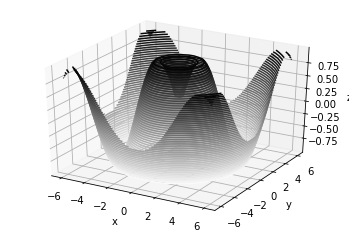

In [421]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



In [282]:
print("\x1b[31m\"red\"\x1b[0m")

"red"


In [427]:
_x = allCasesDF.index.levels[0].values
_y = allCasesDF.index.levels[1].values
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

In [251]:
id = '3'

def getCGobj (case,k):
    ma = max([v for v in case[k].keys() if "master" in v])
    return case[k][ma]['obj']
def getCGKist(case,id):
    cas = case[id]['cgAll']
    cgRes = {v1:getCGobj(cas,v1) for v1 in cas.keys() }
    return pd.DataFrame(cgRes,index =  ['cg']).T
def compareFor(id):
    cgr = getCGKist(results5,id)
    mipr =pd.DataFrame( pd.DataFrame(results5[id]['mip']['obj']).unstack()['obj']['MIP_init'])
    df = pd.concat([cgr,mipr],axis=1)
    return pd.concat([df], keys=[id], names=['case'])

In [151]:
self.edgeStatistics.sort_values(by="minPossibleFlow").tail(7)

,capacity,flow,slakc,topologicalBetweenness,flowBetweenness,maxPossibleFlow,minPossibleFlow,slack,slackBetweenness,label
"(s, 26)",6,6,0,0.001,0.122449,6,6,0,0.000000,e6
"(s, 2)",7,7,0,0.004,0.142857,7,7,0,0.000000,e1
"(s, 20)",7,7,0,0.002,0.142857,7,7,0,0.000000,e5
"(s, 27)",7,7,0,0.002,0.142857,7,7,0,0.000000,e7
"(32, t)",19,9,10,0.004,0.387755,19,9,10,0.204082,e151
"(s, 3)",10,10,0,0.012,0.204082,10,10,0,0.000000,e2
"(33, t)",14,14,0,0.010,0.285714,14,12,2,0.040816,e152


ValueError: shape mismatch: objects cannot be broadcast to a single shape

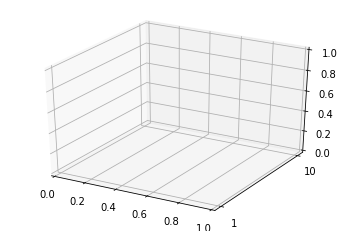

In [410]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
x,y = np.meshgrid(allCasesDF.index.levels[0],allCasesDF.index.levels[1])


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for kk in allCasesDF.index.levels[1]:
    ax.bar(allCasesDF.index.levels[1].values,allCasesDF.index.levels[0].values, allCasesDF.diff)
    print (kk)
# ax.plot_surface(, , z, alpha=0.2)

In [147]:
self.edgeStatistics.index = self.edgeStatistics.index.values
self.edgeStatistics["label"] = self.edgeStatistics.index.to_series().map(self.edgesLableDictReverse)

In [392]:
allCasesDF.index.levels[0]

Index(['1', '10', '11', '13', '14', '15', '151', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '23123', '24', '25', '26', '27', '28', '29',
       '3', '36', '38', '3_1', '4', '4_10', '5', '50', '59', '5_1', '5_10',
       '5_11', '6', '61', '7', '8', '84', '85', '86', '89', '9', '92', '93',
       '94', '96', '97', '98', '99'],
      dtype='object', name='case')

In [133]:
k=2
yHat2 = self.subProblem(pi, c, k)

In [431]:
plt.hist( allCasesDF.gap.trim(upper =4))

AttributeError: 'Series' object has no attribute 'trim'

In [140]:
def getEdgePositive(yh):
    ss = [k for k,v in yh.items() if v>0]
    return ss
getEdgePositive(yHat2)

['e2', 'e152']

In [131]:
self = vvv
(pi, sl), obj = self.masterProblem( yHat1)

In [121]:
with open ("pickled3/netAnn5" , "rb") as f:
    vvv = pickle.load(f)
initilizationTime, initialMaxFlow, initialY  = vvv.initialSolution(2)
yHat1 = vvv.convertListToSolution(initialY) 
c = {}
for e in vvv.G.edges:
    c[vvv.edgesLableDictReverse[e]] = vvv.G.edges[e]['capacity']

In [120]:
os.path.isfile("pickled3/netAnn5")

True

In [316]:
results1

{'1': {'size': (19, 52), 'compare':     cg  MIP_init
  1  7.0       7.0
  2  5.0       5.0
  3  3.0       3.0
  4  2.0       2.0
  5  1.0       1.0, 'mip':               time  obj                        sol
  k method                                          
  1 MIP       0.4035  7.0                      [e50]
    init      0.0023  7.0                      [e50]
    MIP_init  0.4439  7.0                      [e50]
  2 MIP       0.4262  5.0                 [e50, e52]
    init      0.0043  5.0                 [e50, e52]
    MIP_init  0.4148  5.0                 [e50, e52]
  3 MIP       0.4650  3.0            [e41, e50, e52]
    init      0.0062  3.0            [e50, e52, e41]
    MIP_init  0.4724  3.0            [e41, e50, e52]
  4 MIP       0.4897  2.0            [e41, e50, e52]
    init      0.0083  2.0       [e50, e52, e41, e51]
    MIP_init  0.4762  2.0            [e41, e50, e52]
  5 MIP       0.6123  1.0       [e41, e43, e50, e52]
    init      0.0101  1.0  [e50, e52, e41, e51, e43

In [111]:
res['5']['mip'].unstack()

time                    obj                 \
method      MIP    init MIP_init   MIP  init MIP_init   
k                                                       
1       16.2321  0.0032  16.1847  37.0  37.0     37.0   
2       16.3934  0.0052  16.2504  26.0  27.0     26.0   
3       16.6640  0.0078  16.8495  16.0  16.0     16.0   
4       16.9349  0.0109  17.9831  10.0  11.0     10.0   
5       17.6943  0.0132  17.6807   5.0  10.0      5.0   

                               sol                              \
method                         MIP                        init   
k                                                                
1                           [e152]                      [e152]   
2                     [e151, e152]                  [e152, e2]   
3                 [e2, e151, e152]            [e152, e2, e151]   
4           [e2, e151, e152, e153]        [e152, e2, e151, e1]   
5       [e1, e2, e151, e152, e153]  [e152, e2, e151, e1, e118]   

                                    
method                    MIP_init  
k                                   
1                           [e152]  
2                     [e151, e152]  
3                 [e2, e151, e152]  
4           [e2, e151, e152, e153]  
5       [e1, e2, e151, e152, e153]

In [115]:
res['5']['cg']

,int,iny,m1t,m1obj,s1t,s1y,m2t,m2obj,s2t,s2y
1,0.015573,['e152'],12.915355,37.0,0.002152,['e152'],,,,
2,0.019348,"['e2', 'e152']",12.881010,27.0,0.005430,"['e2', 'e152']",,,,
3,0.021339,"['e2', 'e151', 'e152']",12.866715,16.0,0.003078,"['e2', 'e151', 'e152']",,,,
4,0.024868,"['e1', 'e2', 'e151', 'e152']",12.849294,11.0,0.003876,"['e1', 'e2', 'e151', 'e152']",,,,
5,0.027241,"['e1', 'e2', 'e118', 'e151', 'e152']",12.842675,10.0,0.005869,"['e1', 'e2', 'e118', 'e151', 'e152']",,,,


In [280]:
def getCGobj (case,k):
    ma = max([v for v in case[k].keys() if "master" in v])
    return case[k][ma]['obj']
def getCGKist(case,id):
    cas = case[id]['cgAll']
    cgRes = {v1:getCGobj(cas,v1) for v1 in cas.keys() }
    return pd.DataFrame(cgRes,index =  ['cg']).T
def compareFor(res, id):
    cgr = getCGKist(res,id)
    mipr =pd.DataFrame( pd.DataFrame(res[id]['mip']['obj']).unstack()['obj']['MIP_init'])
    df = pd.concat([cgr,mipr],axis=1)
    return pd.concat([df], keys=[id], names=['case'])
compareFor(results1,'1')

cg  MIP_init
case                 
1    1  7.0       7.0
     2  5.0       5.0
     3  3.0       3.0
     4  2.0       2.0
     5  1.0       1.0

In [815]:
from NetAnalysis import NetAnalysis
n15 = NetAnalysis.generate_random([2,  12, 2])
saveData(n15,"N13E27")
n15.size

['s', '2', '3', '4', '5', '7', '9', '10', '12', '13', '14', '15', '16', 't']


(14, 32)

In [834]:
n15.solvefork(1)
n15.solvefork(2)
n15.solvefork(3)
n15.results

time   obj              sol
k method                                 
1 MIP       0.1996  17.0            [e32]
  init      0.0040  17.0            [e32]
  MIP_init  0.1749  17.0            [e32]
2 MIP       0.1539  10.0        [e5, e32]
  init      0.0060  12.0       [e32, e26]
  MIP_init  0.1799  10.0        [e5, e32]
3 MIP       0.2429   5.0  [e24, e27, e32]
  init      0.0060   9.0  [e32, e26, e30]
  MIP_init  0.2668   5.0  [e26, e27, e32]

In [836]:
n15.results.unstack()

time                    obj                             sol  \
method     MIP    init MIP_init   MIP  init MIP_init              MIP   
k                                                                       
1       0.1996  0.0040   0.1749  17.0  17.0     17.0            [e32]   
2       0.1539  0.0060   0.1799  10.0  12.0     10.0        [e5, e32]   
3       0.2429  0.0060   0.2668   5.0   9.0      5.0  [e24, e27, e32]   

                                          
method             init         MIP_init  
k                                         
1                 [e32]            [e32]  
2            [e32, e26]        [e5, e32]  
3       [e32, e26, e30]  [e26, e27, e32]

## column generation

In [840]:
n15.resultsGC[""]

,int,iny,m1t,m1obj,s1t,s1y,m2t,m2obj,s2t,s2y
2,0.015990,"['e26', 'e32']",0.123923,12.0,0.002999,"['e26', 'e32']",,,,
1,0.013991,['e32'],0.112930,17.0,0.001999,['e32'],,,,
3,0.013991,"['e26', 'e30', 'e32']",0.098940,9.0,0.003998,"['e5', 'e26', 'e32']",,,,


In [839]:
n15.colGen2(3)

================================================== master problem




======================sub problem============================ 


\================================================== master problem




======================sub problem============================ 


================================================== master problem
{'init': {'t': 0.013991117477416992, 'y': ['e26', 'e30', 'e32']}, 'master1': {'t': 0.09893989562988281, 'obj': 9.0}, 'sub1': {'t': 0.0039975643157958984, 'y': ['e5', 'e26', 'e32']}, 'master2': {'t': 0.09794187545776367, 'obj': 5.0}, 'sub2': {'t': 0.003996372222900391, 'y': ['e5', 'e26', 'e32']}}


{'init': {'t': 0.013991117477416992, 'y': ['e26', 'e30', 'e32']},
 'master1': {'t': 0.09893989562988281, 'obj': 9.0},
 'sub1': {'t': 0.0039975643157958984, 'y': ['e5', 'e26', 'e32']},
 'master2': {'t': 0.09794187545776367, 'obj': 5.0},
 'sub2': {'t': 0.003996372222900391, 'y': ['e5', 'e26', 'e32']}}

# (21,78)

In [6]:
from NetAnalysis import NetAnalysis
n21 = NetAnalysis.generate_random([2, 10, 10, 2])
n21.size

True
['s', '4', '5', '7', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', 't']

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only


(21, 77)

In [8]:
for i in range(1,6):
    n21.solvefork(i)
n21.results.unstack()

time                    obj                                  sol  \
method     MIP    init MIP_init   MIP  init MIP_init                   MIP   
k                                                                            
1       4.8444  0.0020   4.8534  17.0  17.0     17.0                  [e5]   
2       4.7339  0.0040   4.7701  11.0  12.0     11.0              [e4, e5]   
3       5.1638  0.0050   5.1908   6.0  12.0      6.0          [e1, e4, e5]   
4       5.6845  0.0070   5.6435   2.0  12.0      2.0      [e1, e3, e4, e5]   
5       5.2039  0.0090   4.9150  -0.0   8.0     -0.0  [e1, e2, e3, e4, e5]   

                                                       
method                     init              MIP_init  
k                                                      
1                          [e5]                  [e5]  
2                      [e5, e1]              [e4, e5]  
3                 [e5, e1, e77]          [e1, e4, e5]  
4            [e5, e1, e77, e75]      [e1, e3, e4, e5]  
5       [e5, e1, e77, e75, e64]  [e1, e2, e3, e4, e5]

## Column Gen

In [7]:
for i in range(1,6):
    n21.colGen2(i)

================================================== master problem
Optimize a model with 77 rows, 804 columns and 5735 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 9 rows and 80 columns
Presolve time: 0.01s
Presolved: 68 rows, 724 columns, 5718 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7000000e+01   5.599000e+01   0.000000e+00      0s
      11    1.7000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.01 seconds
Optimal objective  1.700000000e+01




======================sub problem============================ 
Optimize a model with 1 rows, 77 columns and 77 nonzeros
Variable types: 0 continuous, 77 integer (77 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 7e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Found heuristic solution: objective 11.0000000
Presolve removed 0 rows and 72 columns
Presolve time: 0.00s
Presolved: 1 rows, 5 columns, 5 nonzeros
Variable types: 0 continuous, 5 integer (5 binary)

Root relaxation: objective 1.800000e+01, 1 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      18.0000000   18.00000  0.00%     -    0s

Explored 0 nodes (1 simplex iterations) in 0.02 seconds
Thread count was 4 (of 4 available processors)

Solution count 2: 18 11 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.800000000000e+01, best bound 1.800000000000e+01, gap 0.0000%


================================================== master problem
{'init': {'t': 0.01898813247680664, 'y': ['e1', 'e5', 'e77']}, 'master1': {'t': 3.8250930309295654, 'obj': 12.0}, 'sub1': {'t': 0.03145647048950195, 'y': ['e1', 'e4', 'e5']}, 'master2'

In [12]:
n21.colGen2(5)

================================================== master problem
Optimize a model with 77 rows, 804 columns and 5735 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 67 rows and 790 columns
Presolve time: 0.01s
Presolved: 10 rows, 14 columns, 55 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0006000e+01   1.501250e+01   0.000000e+00      0s
       5    8.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  8.000000000e+00




======================sub problem============================ 
Optimize a model with 1 rows, 77 columns and 77 nonzeros
Variable types: 0 continuous, 77 integer (77 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 5e+00]
F

{'init': {'t': 0.019986629486083984, 'y': ['e1', 'e5', 'e64', 'e75', 'e77']},
 'master1': {'t': 3.9509763717651367, 'obj': 8.0},
 'sub1': {'t': 0.02298712730407715, 'y': ['e1', 'e3', 'e64', 'e75', 'e77']},
 'master2': {'t': 4.361368179321289, 'obj': 4.0},
 'sub2': {'t': 0.02098846435546875, 'y': ['e1', 'e3', 'e64', 'e75', 'e77']}}

In [11]:
n21.resultsGC

,int,iny,m1t,m1obj,s1t,s1y,m2t,m2obj,s2t,s2y
1,0.015631,['e5'],3.770469,17.0,0.031980,['e5'],,,,
2,0.016990,"['e1', 'e5']",3.828359,12.0,0.046974,"['e4', 'e5']",3.83093,11,0.028981,"['e4', 'e5']"
3,0.018988,"['e1', 'e5', 'e77']",3.825093,12.0,0.031456,"['e1', 'e4', 'e5']",3.80044,6,0.0349798,"['e1', 'e4', 'e5']"
4,0.019986,"['e1', 'e5', 'e75', 'e77']",3.976552,12.0,0.015991,"['e1', 'e3', 'e4', 'e5']",4.02865,2,0.0209901,"['e1', 'e3', 'e4', 'e5']"
5,0.027981,"['e1', 'e5', 'e64', 'e75', 'e77']",3.915319,8.0,0.020988,"['e1', 'e3', 'e64', 'e75', 'e77']",3.99354,4,0.029979,"['e1', 'e3', 'e64', 'e75', 'e77']"
6,0.022987,"['e1', 'e5', 'e63', 'e64', 'e75', 'e77']",3.899830,6.0,0.024985,"['e1', 'e3', 'e63', 'e64', 'e75', 'e77']",3.93058,2,0.01999,"['e1', 'e3', 'e63', 'e64', 'e75', 'e77']"


# (32,166)

In [732]:
from NetAnalysis import NetAnalysis
n40 = NetAnalysis.generate_random([6, 15, 15, 6])
n40.size

(32, 166)

In [731]:
with open("large166.pickel",'wb') as f:
    pickle.dump(n40,f)

In [858]:
n40.results.unstack()

time                     obj                 \
method       MIP    init  MIP_init   MIP  init MIP_init   
k                                                         
2        87.8738  0.0110   85.5879  18.0  22.0     18.0   
3       113.4332  0.0230  114.0796  14.0  21.0     14.0   
1        89.0502  0.0070   81.2760  26.0  26.0     26.0   
4       137.6250  0.0260  165.0181  10.0  13.0     10.0   
5       149.3595  0.0310  128.3938   7.0  11.0      7.0   
6       230.6420  0.0300  296.3112   5.0  11.0      5.0   

                               sol                               \
method                         MIP                         init   
k                                                                 
2                       [e3, e166]                   [e166, e1]   
3                   [e1, e3, e166]               [e166, e1, e2]   
1                           [e166]                       [e166]   
4             [e1, e3, e161, e166]           [e166, e1, e2, e3]   
5       [e1, e3, e161, e163, e166]       [e166, e1, e2, e3, e4]   
6         [e1, e3, e5, e161, e166]  [e166, e1, e2, e3, e4, e95]   

                                      
method                      MIP_init  
k                                     
2                         [e3, e166]  
3                     [e1, e3, e166]  
1                             [e166]  
4               [e1, e3, e161, e166]  
5         [e1, e3, e161, e163, e166]  
6       [e1, e3, e4, e5, e161, e166]

## column generation

In [859]:
n40.resultsGC = {i: colGen(n40, i) for i in range(1,7)}

================================================== master problem
Optimize a model with 166 rows, 4472 columns and 35076 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 141 rows and 4416 columns
Presolve time: 0.02s
Presolved: 25 rows, 56 columns, 269 nonzeros

Ordering time: 0.00s

Barrier performed 0 iterations in 0.02 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 18 iterations and 0.03 seconds
Optimal objective  1.100000000e+01




======================sub problem============================ 
Optimize a model with 1 rows, 166 columns and 166 nonzeros
Variable types: 0 continuous, 166 integer (166 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+01]
  Bounds rang

In [862]:
n40.resultsGC

{2: {'init': {'t': 0.025983572006225586, 'y': ['e1', 'e166']},
  'master1': {'t': 61.59287071228027, 'obj': 22.0},
  'sub1': {'t': 0.03297996520996094, 'y': ['e3', 'e166']},
  'master2': {'t': 65.90098667144775, 'obj': 18.0},
  'sub2': {'t': 0.024982929229736328, 'y': ['e3', 'e166']}},
 3: {'init': {'t': 0.026983976364135742, 'y': ['e1', 'e166']},
  'master1': {'t': 70.0919873714447, 'obj': 22.0},
  'sub1': {'t': 0.05996298789978027, 'y': ['e3', 'e161', 'e166']},
  'master2': {'t': 68.9248743057251, 'obj': 14.0},
  'sub2': {'t': 0.06096196174621582, 'y': ['e3', 'e161', 'e166']}},
 4: {'init': {'t': 0.041974544525146484, 'y': ['e1', 'e166']},
  'master1': {'t': 65.0201678276062, 'obj': 22.0},
  'sub1': {'t': 0.06196260452270508, 'y': ['e1', 'e3', 'e161', 'e166']},
  'master2': {'t': 66.94494652748108, 'obj': 10.0},
  'sub2': {'t': 0.05296635627746582, 'y': ['e1', 'e3', 'e161', 'e166']}},
 5: {'init': {'t': 0.06296133995056152, 'y': ['e1', 'e2', 'e3', 'e4', 'e166']},
  'master1': {'t': 6

# (38, 216)

In [ ]:
results1 = readResFromPickles('pickled1/')

In [677]:
results1['522']['mip'].unstack()

time                     obj                 \
method       MIP    init  MIP_init   MIP  init MIP_init   
k                                                         
1       167.4173  0.0424  165.4213  65.0  65.0     65.0   
2       179.0359  0.0749  175.9202  55.0  56.0     55.0   
3       198.7482  0.0514  191.4318  46.0  55.0     46.0   
4       200.7198  0.0938  190.2752  39.0  48.0     39.0   
5       207.1742  0.1408  198.2771  32.0  46.0     32.0   

                             sol                              \
method                       MIP                        init   
k                                                              
1                         [e214]                      [e214]   
2                    [e12, e214]                [e214, e215]   
3              [e17, e203, e214]            [e214, e215, e1]   
4          [e2, e12, e214, e215]        [e214, e215, e1, e2]   
5       [e5, e8, e12, e17, e214]  [e214, e215, e1, e2, e216]   

                                    
method                    MIP_init  
k                                   
1                           [e214]  
2                     [e203, e214]  
3               [e203, e214, e215]  
4           [e5, e203, e214, e215]  
5       [e2, e8, e203, e214, e215]

In [679]:
results1['522']['cgAll']

{1: {'init': {'t': 0.05353212356567383, 'y': ['e214']},
  'master1': {'t': 133.85798954963684, 'obj': 65.0},
  'sub1': {'t': 0.007086992263793945, 'y': ['e214']}},
 2: {'init': {'t': 0.0903933048248291, 'y': ['e214', 'e215']},
  'master1': {'t': 136.53493452072144, 'obj': 56.0},
  'sub1': {'t': 0.0076982975006103516, 'y': ['e214', 'e215']}},
 3: {'init': {'t': 0.11142897605895996, 'y': ['e1', 'e214', 'e215']},
  'master1': {'t': 127.48713803291321, 'obj': 55.0},
  'sub1': {'t': 0.006663084030151367, 'y': ['e12', 'e214', 'e215']},
  'master2': {'t': 124.99837017059326, 'obj': 46.0},
  'sub2': {'t': 0.1353754997253418, 'y': ['e12', 'e214', 'e215']}},
 4: {'init': {'t': 0.21216654777526855, 'y': ['e1', 'e2', 'e214', 'e215']},
  'master1': {'t': 131.53190755844116, 'obj': 48.0},
  'sub1': {'t': 0.06217169761657715, 'y': ['e8', 'e12', 'e214', 'e215']},
  'master2': {'t': 142.0821418762207, 'obj': 39.0},
  'sub2': {'t': 0.13715076446533203, 'y': ['e8', 'e12', 'e214', 'e215']}},
 5: {'init': 

In [678]:
results1['522']['cg']

,int,iny,m1t,m1obj,s1t,s1y,m2t,m2obj,s2t,s2y
1,0.053532,['e214'],133.857990,65.0,0.007087,['e214'],,,,
2,0.090393,"['e214', 'e215']",136.534935,56.0,0.007698,"['e214', 'e215']",,,,
3,0.111429,"['e1', 'e214', 'e215']",127.487138,55.0,0.006663,"['e12', 'e214', 'e215']",124.998,46,0.135375,"['e12', 'e214', 'e215']"
4,0.212167,"['e1', 'e2', 'e214', 'e215']",131.531908,48.0,0.062172,"['e8', 'e12', 'e214', 'e215']",142.082,39,0.137151,"['e8', 'e12', 'e214', 'e215']"
5,0.205476,"['e1', 'e2', 'e214', 'e215', 'e216']",127.467208,46.0,0.087896,"['e2', 'e12', 'e214', 'e215', 'e216']",133.97,37,0.222602,"['e2', 'e12', 'e214', 'e215', 'e216']"


In [681]:
with open('pickled/netAnn522' , 'rb') as f:
    n522 = pickle.load(f)

In [ ]:
from multipr
for k in range(1,6):
    n522.solvefork(k)
for k in range(1,7):
    n522.colGen2(k)

In [684]:
n522.results.unstack()

time                     obj                 \
method       MIP    init  MIP_init   MIP  init MIP_init   
k                                                         
1       167.4173  0.0424  165.4213  65.0  65.0     65.0   
2       179.0359  0.0749  175.9202  55.0  56.0     55.0   
3       198.7482  0.0514  191.4318  46.0  55.0     46.0   
4       200.7198  0.0938  190.2752  39.0  48.0     39.0   
5       207.1742  0.1408  198.2771  32.0  46.0     32.0   
6       375.5967     NaN       NaN  25.0   NaN      NaN   

                                  sol                              \
method                            MIP                        init   
k                                                                   
1                              [e214]                      [e214]   
2                         [e12, e214]                [e214, e215]   
3                   [e17, e203, e214]            [e214, e215, e1]   
4               [e2, e12, e214, e215]        [e214, e215, e1, e2]   
5            [e5, e8, e12, e17, e214]  [e214, e215, e1, e2, e216]   
6       [e2, e5, e8, e17, e203, e214]                         NaN   

                                    
method                    MIP_init  
k                                   
1                           [e214]  
2                     [e203, e214]  
3               [e203, e214, e215]  
4           [e5, e203, e214, e215]  
5       [e2, e8, e203, e214, e215]  
6                              NaN

In [685]:
n522.resultsGC

,int,iny,m1t,m1obj,s1t,s1y,m2t,m2obj,s2t,s2y
1,0.053532,['e214'],133.857990,65.0,0.007087,['e214'],,,,
2,0.090393,"['e214', 'e215']",136.534935,56.0,0.007698,"['e214', 'e215']",,,,
3,0.111429,"['e1', 'e214', 'e215']",127.487138,55.0,0.006663,"['e12', 'e214', 'e215']",124.998,46,0.135375,"['e12', 'e214', 'e215']"
4,0.212167,"['e1', 'e2', 'e214', 'e215']",131.531908,48.0,0.062172,"['e8', 'e12', 'e214', 'e215']",142.082,39,0.137151,"['e8', 'e12', 'e214', 'e215']"
5,0.205476,"['e1', 'e2', 'e214', 'e215', 'e216']",127.467208,46.0,0.087896,"['e2', 'e12', 'e214', 'e215', 'e216']",133.97,37,0.222602,"['e2', 'e12', 'e214', 'e215', 'e216']"


In [686]:
n522.resultsGCDict

{1: {'init': {'t': 0.05353212356567383, 'y': ['e214']},
  'master1': {'t': 133.85798954963684, 'obj': 65.0},
  'sub1': {'t': 0.007086992263793945, 'y': ['e214']}},
 2: {'init': {'t': 0.0903933048248291, 'y': ['e214', 'e215']},
  'master1': {'t': 136.53493452072144, 'obj': 56.0},
  'sub1': {'t': 0.0076982975006103516, 'y': ['e214', 'e215']}},
 3: {'init': {'t': 0.11142897605895996, 'y': ['e1', 'e214', 'e215']},
  'master1': {'t': 127.48713803291321, 'obj': 55.0},
  'sub1': {'t': 0.006663084030151367, 'y': ['e12', 'e214', 'e215']},
  'master2': {'t': 124.99837017059326, 'obj': 46.0},
  'sub2': {'t': 0.1353754997253418, 'y': ['e12', 'e214', 'e215']}},
 4: {'init': {'t': 0.21216654777526855, 'y': ['e1', 'e2', 'e214', 'e215']},
  'master1': {'t': 131.53190755844116, 'obj': 48.0},
  'sub1': {'t': 0.06217169761657715, 'y': ['e8', 'e12', 'e214', 'e215']},
  'master2': {'t': 142.0821418762207, 'obj': 39.0},
  'sub2': {'t': 0.13715076446533203, 'y': ['e8', 'e12', 'e214', 'e215']}},
 5: {'init': 

# (50)

In [ ]:
from NetAnalysis import NetAnalysis
n40 = NetAnalysis.generate_random([6, 25, 25, 6])

['s', '3', '4', '5', '6', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', 't']


#  (11,23)